In [1]:
pip install pycatcher --upgrade


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycatcher as pc

### Example 1 - Finding Outliers Using IQR

In [3]:
import pandas as pd

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [10, 12, 14, 200, 15]
}

df = pd.DataFrame(df)
pc.detect_outliers(df)

2024-11-13 23:10:32,213 - INFO - Starting outlier detection.
2024-11-13 23:10:32,235 - INFO - Time frequency: D
2024-11-13 23:10:32,235 - INFO - Length of time index: 5.00
2024-11-13 23:10:32,237 - INFO - Using IQR method for outlier detection.
2024-11-13 23:10:32,237 - INFO - Detecting outliers using the IQR method.
2024-11-13 23:10:32,239 - INFO - Detecting outliers using the IQR method.
2024-11-13 23:10:32,242 - INFO - Outliers detected: 1 rows.
2024-11-13 23:10:32,243 - INFO - Outliers detected using IQR: 1 rows.


,Value
Dt,
2024-01-04,200


### Example 2 - Finding Outliers Using Seasonal Decomposition

In [4]:
!pip install fsspec


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install --upgrade certifi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import pandas as pd
df_tsa=pd.read_csv("https://huggingface.co/datasets/bbgatch/tsa-passengers/resolve/main/tsa.csv",sep=',')

In [7]:
df_tsa.head(5)

,date,passengers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [8]:
x = pc.detect_outliers_latest(df_tsa) 
print(x)

2024-11-13 23:10:47,209 - INFO - Detecting the latest outliers.
2024-11-13 23:10:47,211 - INFO - Starting outlier detection.
2024-11-13 23:10:47,448 - INFO - Time frequency: D
2024-11-13 23:10:47,448 - INFO - Length of time index: 2017.00
2024-11-13 23:10:47,448 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-11-13 23:10:47,448 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-13 23:10:47,453 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:10:47,453 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:10:47,453 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:10:47,454 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:10:47,454 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-13 23:10:47,456 - INFO - Calculating the sum of squares.
2024-11-13 23:10:47,456 - INFO - Sum of squares calculated: 1.60
2024-11-13 23

            passengers
date                  
2024-07-09     2580013


In [9]:
x = pc.detect_outliers(df_tsa) 
print(x)

2024-11-13 23:10:52,617 - INFO - Starting outlier detection.
2024-11-13 23:10:52,630 - INFO - Time frequency: D
2024-11-13 23:10:52,631 - INFO - Length of time index: 2017.00
2024-11-13 23:10:52,632 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-11-13 23:10:52,632 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-13 23:10:52,635 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:10:52,636 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:10:52,636 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:10:52,636 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:10:52,637 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-13 23:10:52,638 - INFO - Calculating the sum of squares.
2024-11-13 23:10:52,638 - INFO - Sum of squares calculated: 1.60
2024-11-13 23:10:52,638 - INFO - Sum of squares of ACF: 1.60
2024-11-13 23:10

            passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-31     1665839
2023-11-21 

In [10]:
x = pc.detect_outliers_today(df_tsa) 
print(x)

2024-11-13 23:10:58,357 - INFO - Detecting today's outliers.
2024-11-13 23:10:58,359 - INFO - Starting outlier detection.
2024-11-13 23:10:58,369 - INFO - Time frequency: D
2024-11-13 23:10:58,370 - INFO - Length of time index: 2017.00
2024-11-13 23:10:58,370 - INFO - Using seasonal trend decomposition for for outlier detection in day level time-series.
2024-11-13 23:10:58,371 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-13 23:10:58,374 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:10:58,374 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:10:58,375 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:10:58,375 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:10:58,375 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-13 23:10:58,376 - INFO - Calculating the sum of squares.
2024-11-13 23:10:58,376 - INFO - Sum of squares calculated: 1.60
2024-11-13 23:10

No Outliers Today!


In [11]:
from pycatcher.diagnostics import build_seasonal_plot as build_seasonal_plot
from pycatcher.diagnostics import build_monthwise_plot as build_monthwise_plot
from pycatcher.diagnostics import build_iqr_plot as build_iqr_plot
from pycatcher.diagnostics import build_decomposition_results as build_decomposition_results

2024-11-13 23:11:03,534 - INFO - Building month-wise box plot.
2024-11-13 23:11:03,592 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-13 23:11:03,597 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


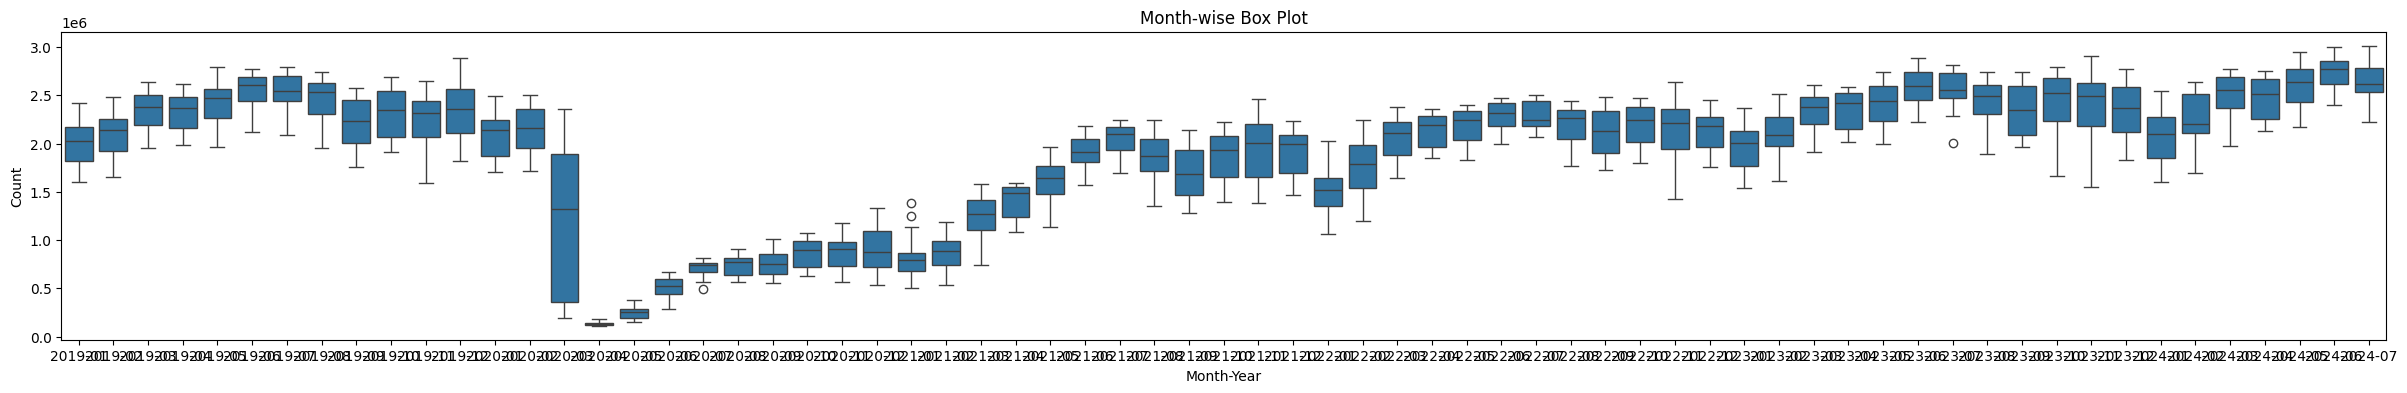

In [12]:
#Diagnostic plots
build_monthwise_plot(df_tsa)

2024-11-13 23:11:05,870 - INFO - Building time-series plot for seasonal decomposition.
2024-11-13 23:11:05,878 - INFO - Time-series data length: 5.00 years
2024-11-13 23:11:05,881 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:11:05,882 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:11:05,883 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:11:05,884 - INFO - Number of residuals after NaN removal: 2017
2024-11-13 23:11:05,884 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-13 23:11:05,885 - INFO - Calculating the sum of squares.
2024-11-13 23:11:05,886 - INFO - Sum of squares calculated: 1.60
2024-11-13 23:11:05,886 - INFO - Sum of squares of ACF: 1.60
2024-11-13 23:11:05,886 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-13 23:11:05,887 - INFO - Calculating the sum of squares.
2024-11-13 23:11:05,887 - INFO - Sum of squares calculated: 1.69
2024-11-13 23:11:05,888 - INFO - 

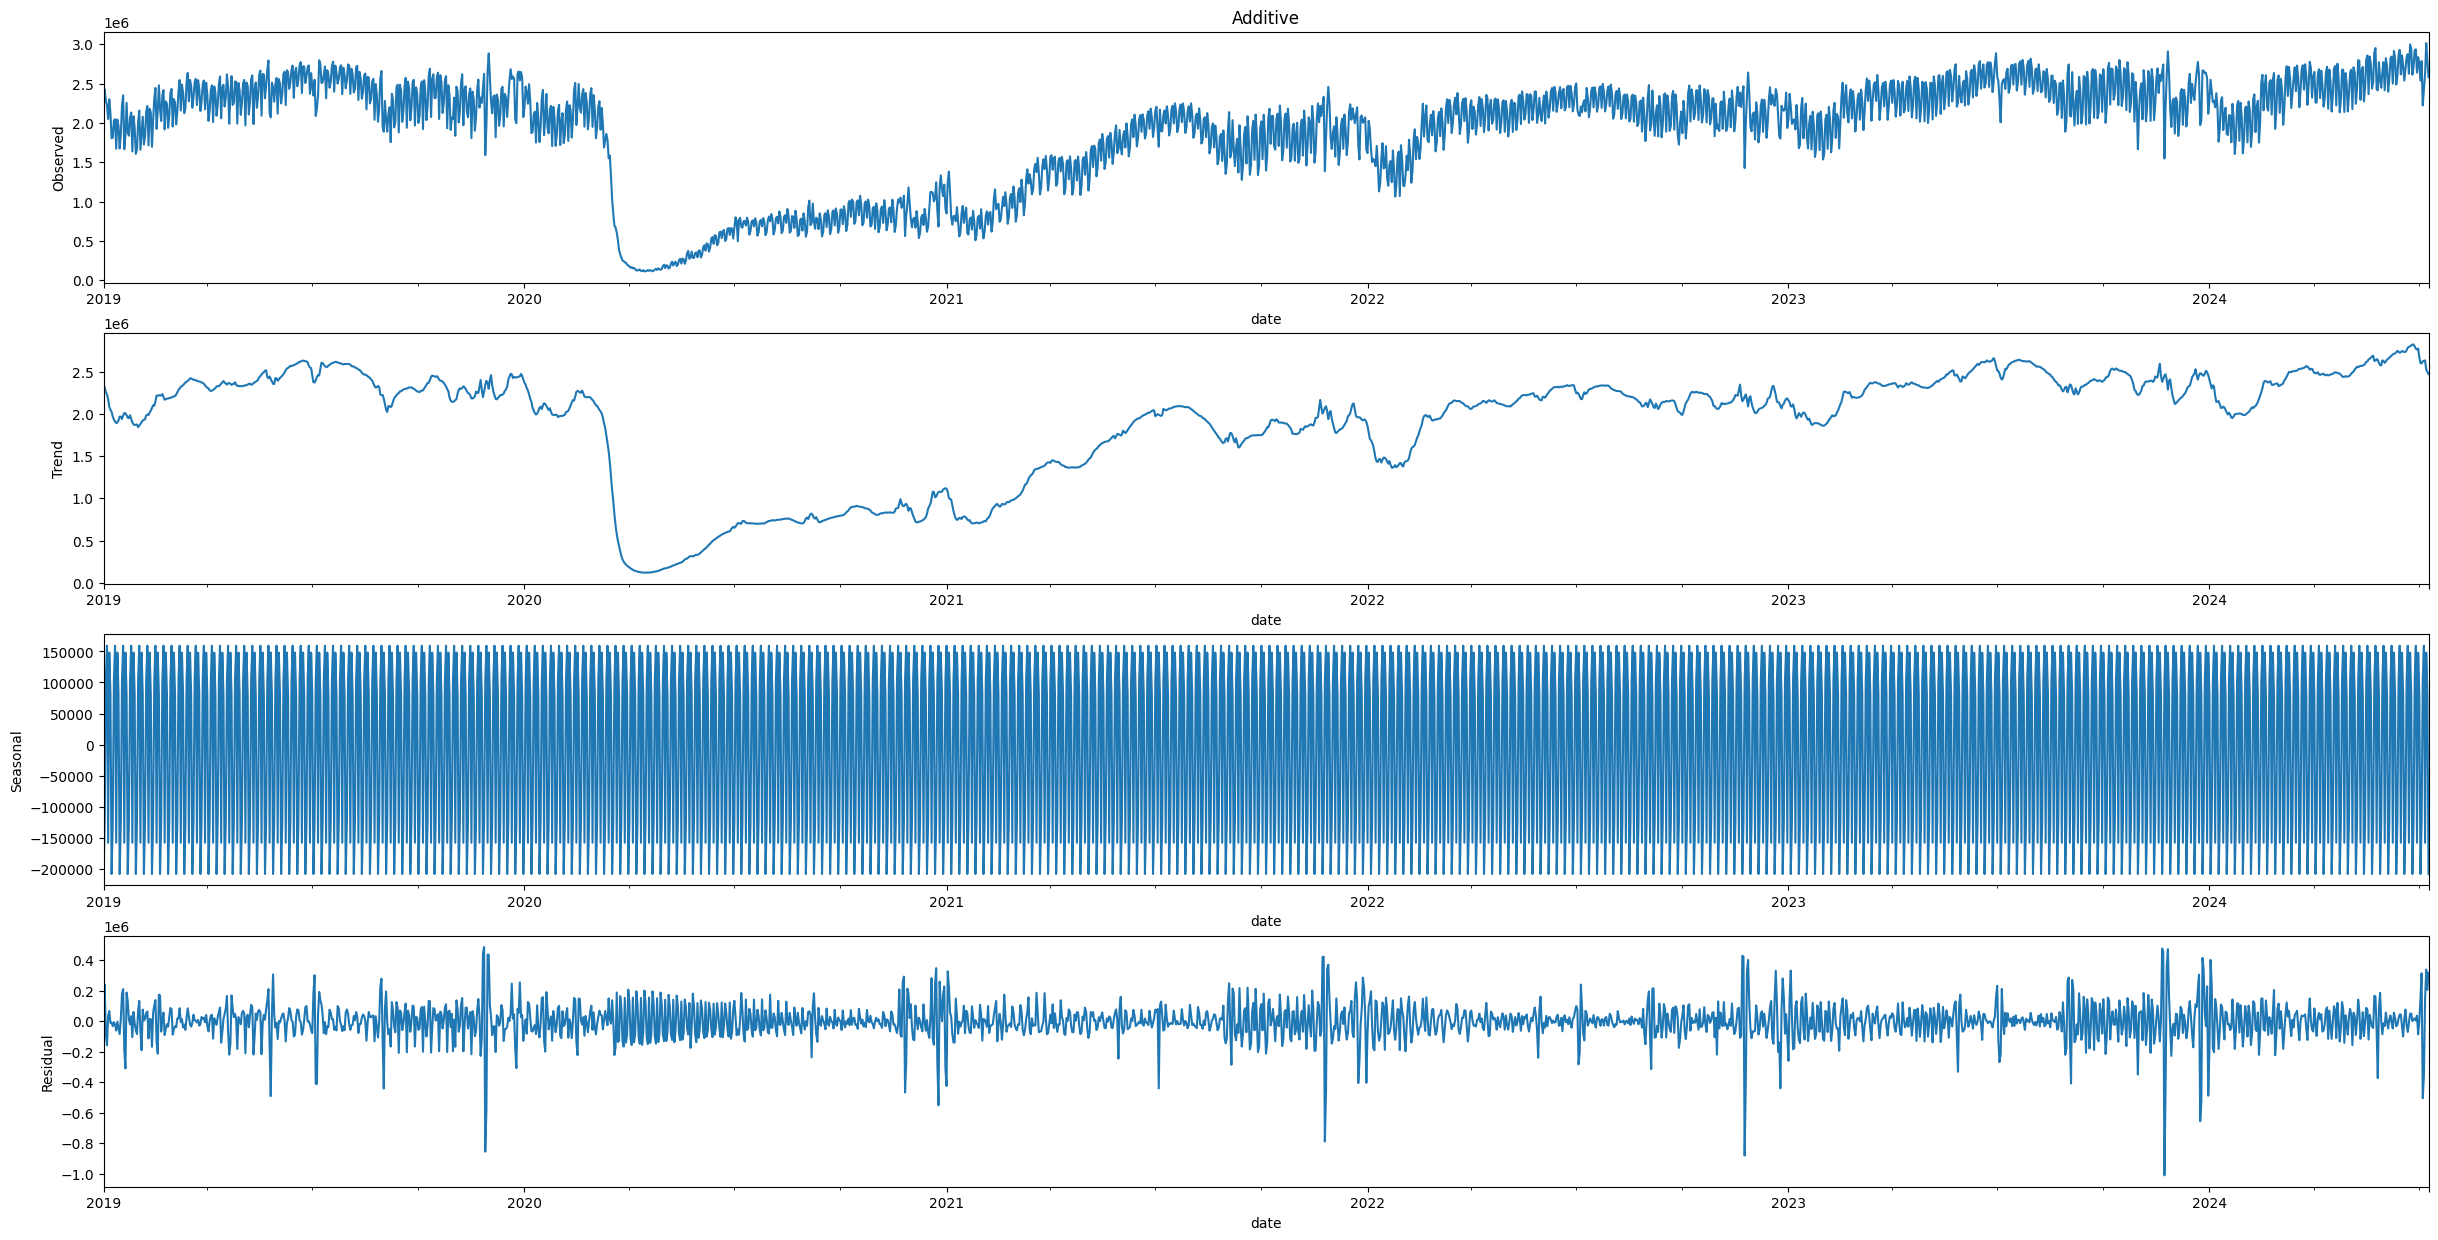

In [13]:
#Diagnostic plots
build_seasonal_plot(df_tsa)

In [14]:
df_ice = pd.read_csv("https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")
df_ice.head(10)

,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22
5,2004-06,25
6,2004-07,27
7,2004-08,21
8,2004-09,18
9,2004-10,14


In [15]:
x = pc.detect_outliers(df_ice) 
print(x)

2024-11-13 23:11:11,746 - INFO - Starting outlier detection.
2024-11-13 23:11:11,792 - INFO - Time frequency: MS
2024-11-13 23:11:11,792 - INFO - Length of time index: 200.00
2024-11-13 23:11:11,793 - INFO - Using seasonal trend decomposition for for outlier detection in month level time-series.
2024-11-13 23:11:11,793 - INFO - Decomposing time-series for additive and multiplicative models.
2024-11-13 23:11:11,795 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:11:11,795 - INFO - Number of residuals after NaN removal: 200
2024-11-13 23:11:11,796 - INFO - Extracting residuals and removing NaN values.
2024-11-13 23:11:11,796 - INFO - Number of residuals after NaN removal: 200
2024-11-13 23:11:11,796 - INFO - Calculating the sum of squares of the ACF of residuals.
2024-11-13 23:11:11,797 - INFO - Calculating the sum of squares.
2024-11-13 23:11:11,797 - INFO - Sum of squares calculated: 3.47
2024-11-13 23:11:11,797 - INFO - Sum of squares of ACF: 3.47
2024-11-13 23:11

            interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66
